In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
#readinf the purchase dataset
dfp= pd.read_csv(r'C:\Users\user\Downloads\QVI_purchase_behaviour.csv')
dfp

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [10]:
# reading the transaction dataset
dft= pd.read_excel(r'C:\Users\user\Downloads\QVI_transaction_data.xlsx')
dft

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips
0,2019-06-30,4,4196,3540,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,chips
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken 134g,2,7.4,no
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2,no
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,no
4,2019-06-30,43,43147,39609,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8,chips
...,...,...,...,...,...,...,...,...,...
264831,2019-06-30,242,242159,246222,36,Kettle Chilli 175g,2,10.8,no
264832,2018-07-01,125,125227,129193,4,Dorito Corn Chp Supreme 380g,2,13.0,chips
264833,2019-06-30,256,256018,255130,105,Woolworths Cheese Rings 190g,2,3.6,no
264834,2019-06-30,257,257079,256218,71,Twisties Cheese Burger 250g,2,8.6,no


In [51]:
#to see all the rows in a file
pd.set_option('display.max.rows', 10000)
print (pd.options.display.max_rows)
#to see all the columns in a file
#pd.set_option('display.max.columns', 15)
print (pd.options.display.max_columns)

10000
15


In [11]:
#combining both transaction and purchase dataset
combined= dft.merge(dfp, how='inner')
combined

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-06-30,4,4196,3540,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,chips,MIDAGE SINGLES/COUPLES,Budget
1,2018-11-19,4,4196,3536,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,no,MIDAGE SINGLES/COUPLES,Budget
2,2019-01-14,4,4196,3538,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,chips,MIDAGE SINGLES/COUPLES,Budget
3,2018-11-30,4,4196,3537,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,chips,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,no,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264831,2018-07-01,176,176365,177355,90,Tostitos Smoked Chipotle 175g,2,8.8,chips,YOUNG SINGLES/COUPLES,Mainstream
264832,2019-06-30,265,265221,263560,20,Doritos Cheese Supreme 330g,1,5.7,no,YOUNG SINGLES/COUPLES,Mainstream
264833,2019-06-30,6,6358,6145,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,no,YOUNG SINGLES/COUPLES,Premium
264834,2018-07-01,197,197027,196931,44,Thins Chips Light& Tangy 175g,2,6.6,chips,YOUNG SINGLES/COUPLES,Mainstream


In [34]:
# Convert the DATE column to datetime format if it's not already
# although i already changed it  on Excel
#combined['DATE'] = pd.to_datetime(combined['DATE'])

In [14]:
filtered_df = combined[combined['Chips'].str.contains('chips', case=False , na=False)]
#filtered_df.to_csv(r'C:\Users\user\Downloads\python tutorial\filtered.csv', index=False)
print(filtered_df)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2019-06-30          4            4196    3540        28   
2      2019-01-14          4            4196    3538        60   
3      2018-11-30          4            4196    3537        93   
7      2019-06-15         55           55073   48889        16   
8      2019-06-06         55           55073   48888       108   
...           ...        ...             ...     ...       ...   
264828 2018-07-01         29           29169   26180        28   
264829 2018-07-01         87           87024   85706        75   
264831 2018-07-01        176          176365  177355        90   
264834 2018-07-01        197          197027  196931        44   
264835 2018-07-01         74           74003   72864        79   

                                       PROD_NAME  PROD_QTY  TOT_SALES  Chips  \
0           Thins Potato Chips  Hot & Spicy 175g         2        6.6  chips   
2           Kettle Tortilla ChpsFeta&Garlic 150

In [16]:
print(filtered_df.dtypes)

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
Chips                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object


In [18]:
find_stat= filtered_df[['PROD_QTY','TOT_SALES']]
# Set Pandas display options to format floats to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
stat= find_stat.describe()
stat

,PROD_QTY,TOT_SALES
count,87335.00,87335.00
mean,1.91,7.29
std,1.01,3.94
min,1.00,1.90
25%,2.00,6.00
50%,2.00,6.60
75%,2.00,8.80
max,200.00,650.00


In [20]:
# 200 product purchased if an outlier
# let us find out how many times
# Filter rows where 'PROD_QTY' is greater than or equal to 100
# two ways to get the outlier
# cust_outlier = filtered_df[filtered_df['PROD_QTY'] == 200]
cust_outlier = filtered_df[filtered_df['LYLTY_CARD_NBR'] == 226000]
cust_outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips,LIFESTAGE,PREMIUM_CUSTOMER
120399,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00,chips,OLDER FAMILIES,Premium
120400,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00,chips,OLDER FAMILIES,Premium


In [22]:
# removing the outlier LYLTY_CARD_NBR for the filtered_df
# Remove the outlier row
filtered_df = filtered_df[filtered_df['LYLTY_CARD_NBR'] != 226000]
filtered_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-06-30,4,4196,3540,28,Thins Potato Chips Hot & Spicy 175g,2,6.60,chips,MIDAGE SINGLES/COUPLES,Budget
2,2019-01-14,4,4196,3538,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20,chips,MIDAGE SINGLES/COUPLES,Budget
3,2018-11-30,4,4196,3537,93,Doritos Corn Chip Southern Chicken 150g,2,7.80,chips,MIDAGE SINGLES/COUPLES,Budget
7,2019-06-15,55,55073,48889,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.40,chips,MIDAGE SINGLES/COUPLES,Budget
8,2019-06-06,55,55073,48888,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.20,chips,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264828,2018-07-01,29,29169,26180,28,Thins Potato Chips Hot & Spicy 175g,2,6.60,chips,YOUNG SINGLES/COUPLES,Mainstream
264829,2018-07-01,87,87024,85706,75,Cobs Popd Sea Salt Chips 110g,2,7.60,chips,YOUNG SINGLES/COUPLES,Mainstream
264831,2018-07-01,176,176365,177355,90,Tostitos Smoked Chipotle 175g,2,8.80,chips,YOUNG SINGLES/COUPLES,Mainstream
264834,2018-07-01,197,197027,196931,44,Thins Chips Light& Tangy 175g,2,6.60,chips,YOUNG SINGLES/COUPLES,Mainstream


In [24]:
by_date = filtered_df.groupby('DATE').size().reset_index(name='count')
by_date 

,DATE,count
0,2018-07-01,198
1,2018-07-02,224
2,2018-07-03,238
3,2018-07-04,225
4,2018-07-05,243
...,...,...
359,2019-06-26,223
360,2019-06-27,212
361,2019-06-28,272
362,2019-06-29,247


In [26]:
# Create a complete sequence of dates from 1 Jul 2018 to 30 Jun 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

In [28]:
# Create a DataFrame from the date range
complete_dates = pd.DataFrame(date_range, columns=['DATE'])

In [30]:
# Merge the complete date range with the transaction counts
merged_data = pd.merge(complete_dates,by_date, on='DATE', how='left')

In [32]:
# Fill missing counts with 0
merged_data['count'] = merged_data['count'].fillna(0)
merged_data

,DATE,count
0,2018-07-01,198.00
1,2018-07-02,224.00
2,2018-07-03,238.00
3,2018-07-04,225.00
4,2018-07-05,243.00
...,...,...
360,2019-06-26,223.00
361,2019-06-27,212.00
362,2019-06-28,272.00
363,2019-06-29,247.00


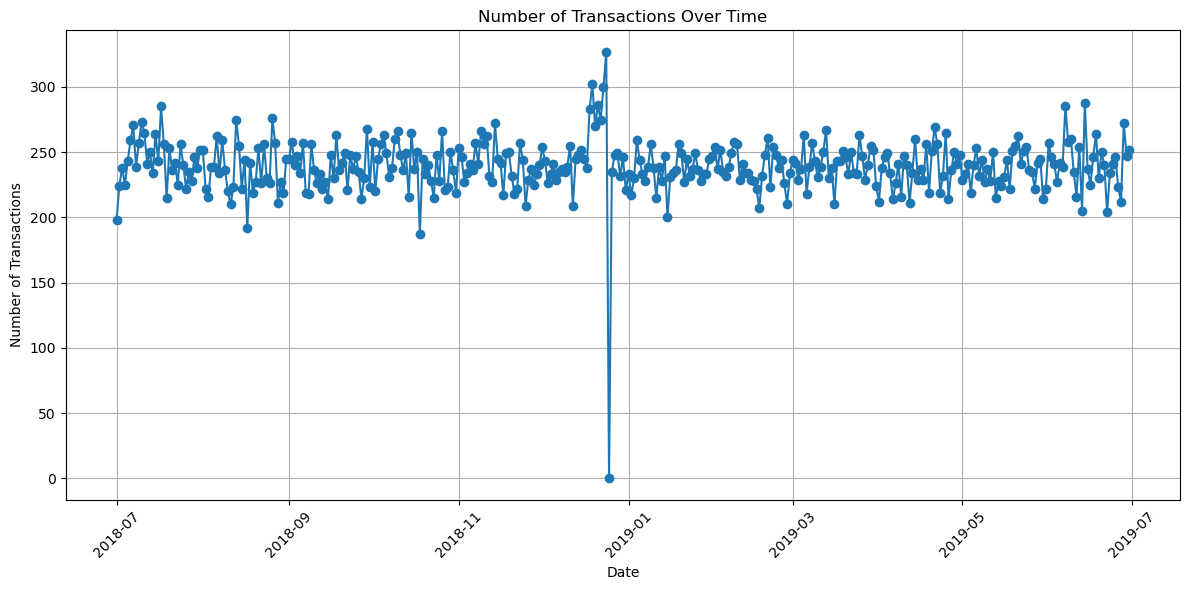

In [34]:
# Plotting the number of transactions over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE'], merged_data['count'], marker='o', linestyle='-')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [36]:

# Filter the DataFrame for December 2018
december_data = filtered_df [(filtered_df ['DATE'] >= '2018-12-01') & 
                                  (filtered_df ['DATE'] < '2019-01-01')]
# Count transactions by individual days in December
transactions_by_day = december_data.groupby(december_data['DATE'].dt.date).size().reset_index(name='count')
transactions_by_day

,DATE,count
0,2018-12-01,254
1,2018-12-02,243
2,2018-12-03,226
3,2018-12-04,233
4,2018-12-05,241
5,2018-12-06,229
6,2018-12-07,235
7,2018-12-08,237
8,2018-12-09,235
9,2018-12-10,239


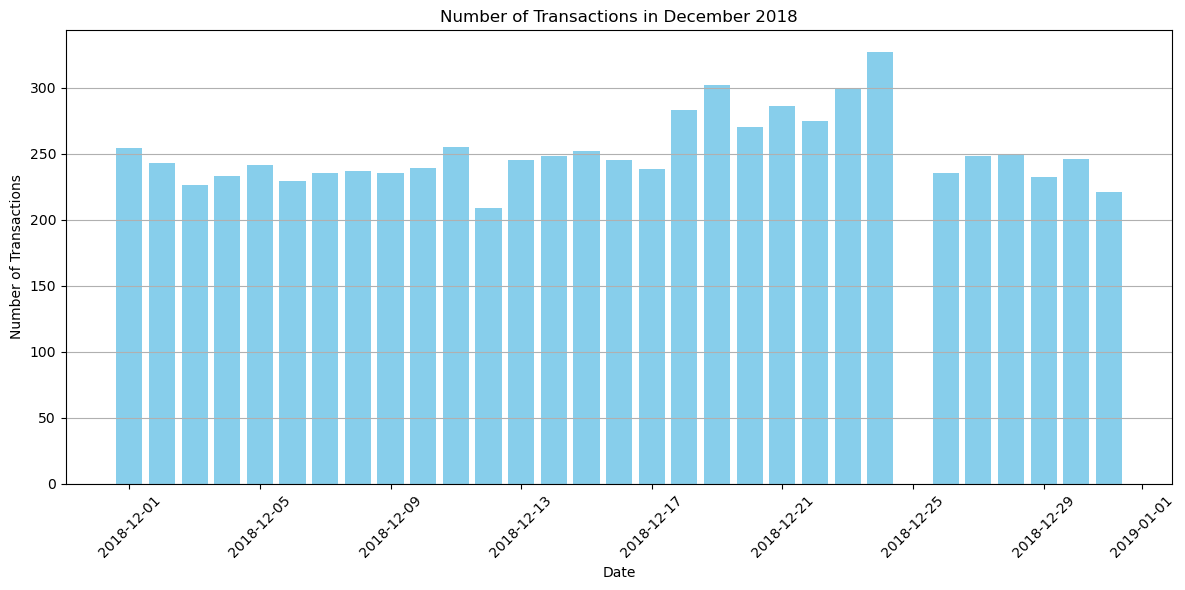

In [38]:
# Plotting the number of transactions in December
plt.figure(figsize=(12, 6))
plt.bar(transactions_by_day['DATE'], transactions_by_day['count'], color='skyblue')
plt.title('Number of Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [52]:
#  Extracting Pack Size from PROD_NAME
# Using regex to extract digits from the PROD_NAME
dft['PACK_SIZE'] = dft['PROD_NAME'].str.extract(r'(\d+)').astype(int)


In [53]:
#Checking the Pack Sizes
pack_size_counts = dft ['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'COUNT']
pack_size_counts = pack_size_counts.sort_values(by='PACK_SIZE')

# Display the pack sizes and their count
pack_size_counts

,PACK_SIZE,COUNT
18,70,1507
14,90,3008
3,110,22387
20,125,1454
2,134,25102
12,135,3257
1,150,43131
16,160,2970
5,165,15297
4,170,19983


In [56]:
# Confirming the largest and smallest sizes
largest_size = pack_size_counts['PACK_SIZE'].max()
smallest_size = pack_size_counts['PACK_SIZE'].min()
print(f"The largest size is {largest_size}g and the smallest size is {smallest_size}g - seems sensible!")

The largest size is 380g and the smallest size is 70g - seems sensible!


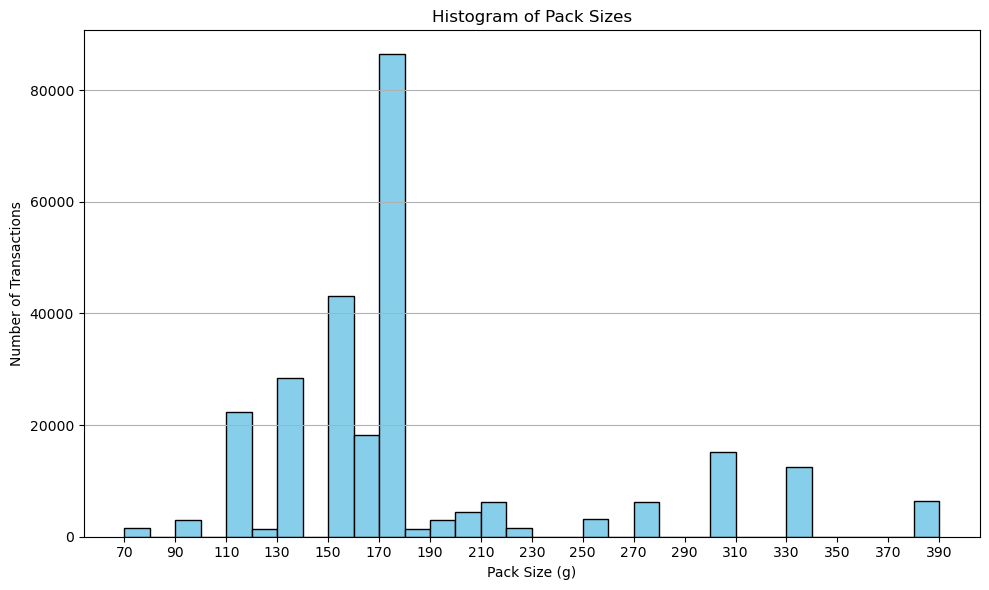

In [58]:
# Plotting a histogram of PACK_SIZE
plt.figure(figsize=(10, 6))
plt.hist(dft['PACK_SIZE'], bins=range(70, 400, 10), color='skyblue', edgecolor='black')
plt.title('Histogram of Pack Sizes')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.xticks(range(70, 400, 20))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [60]:
#Extracting the first word from PROD_NAME as the brand name
dft['BRAND'] = dft['PROD_NAME'].str.split().str[0]

# Checking the resulting brand names
brand_counts = dft['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'COUNT']
brand_counts

,BRAND,COUNT
0,Kettle,41288
1,Smiths,28860
2,Pringles,25102
3,Doritos,24962
4,Thins,14075
5,RRD,11894
6,Infuzions,11057
7,WW,10320
8,Cobs,9693
9,Tostitos,9471


In [61]:
# Identify inconsistent brand names (e.g., "RED" and "RRD" for Red Rock Deli)
print("Inconsistent brand names:")
print(dft[dft['BRAND'].isin(['RED', 'RRD'])])

# Cleaning up inconsistent brand names
dft.loc[dft['BRAND'] == 'RED', 'BRAND'] = 'RRD'

# Checking the cleaned brand names
brand_counts = dft['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'COUNT']
print(brand_counts)

Inconsistent brand names:
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
8      2018-07-01        113          113032  115576         6   
50     2018-07-01        247          247171  249667       103   
104    2018-07-01          5            5085    4863        11   
119    2018-07-01         71           71103   69598        11   
138    2018-07-01        157          157111  159126        11   
...           ...        ...             ...     ...       ...   
264702 2019-06-30        255          255012  254551        11   
264727 2019-06-30        127          127415  130451         6   
264731 2019-06-30        163          163039  163315         6   
264825 2019-06-30        112          112001  113696         6   
264828 2019-06-30        179          179213  180695       103   

                                   PROD_NAME  PROD_QTY  TOT_SALES Chips  \
8                   RRD Lime & Pepper   165g         2       6.00    no   
50      RRD Steak &         Chi

In [64]:
# Calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()



In [66]:
# Visualizing the results
# Creating a pivot table for better visualization
pivot_sales = total_sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES').fillna(0)


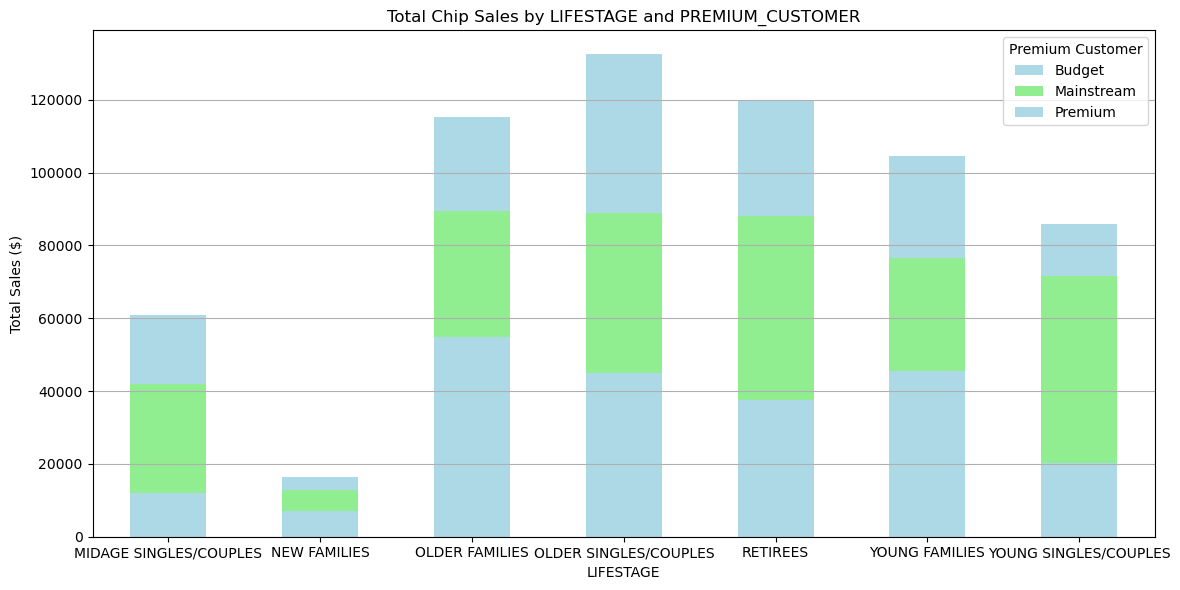

In [68]:
# Plotting the total sales by customer segments
pivot_sales.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'lightgreen'])
plt.title('Total Chip Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.legend(title='Premium Customer')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [70]:
# Display the total sales DataFrame
print(total_sales)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   12090.80
1   MIDAGE SINGLES/COUPLES       Mainstream   29978.75
2   MIDAGE SINGLES/COUPLES          Premium   18930.65
3             NEW FAMILIES           Budget    7097.05
4             NEW FAMILIES       Mainstream    5640.40
5             NEW FAMILIES          Premium    3720.10
6           OLDER FAMILIES           Budget   54808.85
7           OLDER FAMILIES       Mainstream   34709.75
8           OLDER FAMILIES          Premium   25851.00
9    OLDER SINGLES/COUPLES           Budget   44910.30
10   OLDER SINGLES/COUPLES       Mainstream   44114.10
11   OLDER SINGLES/COUPLES          Premium   43439.95
12                RETIREES           Budget   37417.30
13                RETIREES       Mainstream   50673.45
14                RETIREES          Premium   31462.95
15          YOUNG FAMILIES           Budget   45626.85
16          YOUNG FAMILIES       Mainstream   30941.65
17        

In [72]:
# Calculating the average number of units per customer
# Count unique customers for each LIFESTAGE and PREMIUM_CUSTOMER combination
customer_counts = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
# Calculate total units for each combination
total_units = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
# Calculate average units per customer 
average_units_per_customer = total_units / customer_counts
# Convert to DataFrame for easier plotting
average_units_df = average_units_per_customer.reset_index(name='AVG_UNITS')

In [74]:
# Visualization of the results
# Create a pivot table for better visualization
pivot_avg_units = average_units_df.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='AVG_UNITS').fillna(0)

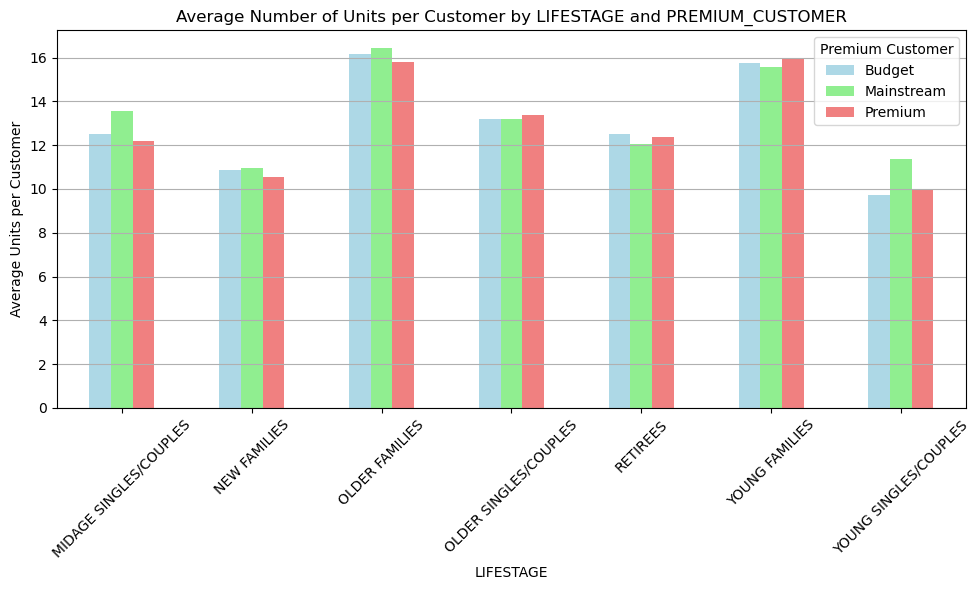

In [76]:
# Plotting the average units per customer by LIFESTAGE and PREMIUM_CUSTOMER
pivot_avg_units.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [78]:
# Display the average units DataFrame
print(average_units_df)

                 LIFESTAGE PREMIUM_CUSTOMER  AVG_UNITS
0   MIDAGE SINGLES/COUPLES           Budget      12.49
1   MIDAGE SINGLES/COUPLES       Mainstream      13.58
2   MIDAGE SINGLES/COUPLES          Premium      12.21
3             NEW FAMILIES           Budget      10.87
4             NEW FAMILIES       Mainstream      10.95
5             NEW FAMILIES          Premium      10.57
6           OLDER FAMILIES           Budget      16.15
7           OLDER FAMILIES       Mainstream      16.43
8           OLDER FAMILIES          Premium      15.79
9    OLDER SINGLES/COUPLES           Budget      13.20
10   OLDER SINGLES/COUPLES       Mainstream      13.21
11   OLDER SINGLES/COUPLES          Premium      13.36
12                RETIREES           Budget      12.53
13                RETIREES       Mainstream      12.05
14                RETIREES          Premium      12.35
15          YOUNG FAMILIES           Budget      15.78
16          YOUNG FAMILIES       Mainstream      15.58
17        

In [80]:
# Calculate average price per unit
# Calculate total sales and total units for each combination
total_sales = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
total_units = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
# Calculate average price per unit
average_price_per_unit = total_sales / total_units
# Convert to DataFrame for easier plotting
average_price_df = average_price_per_unit.reset_index(name='AVG_PRICE_PER_UNIT')


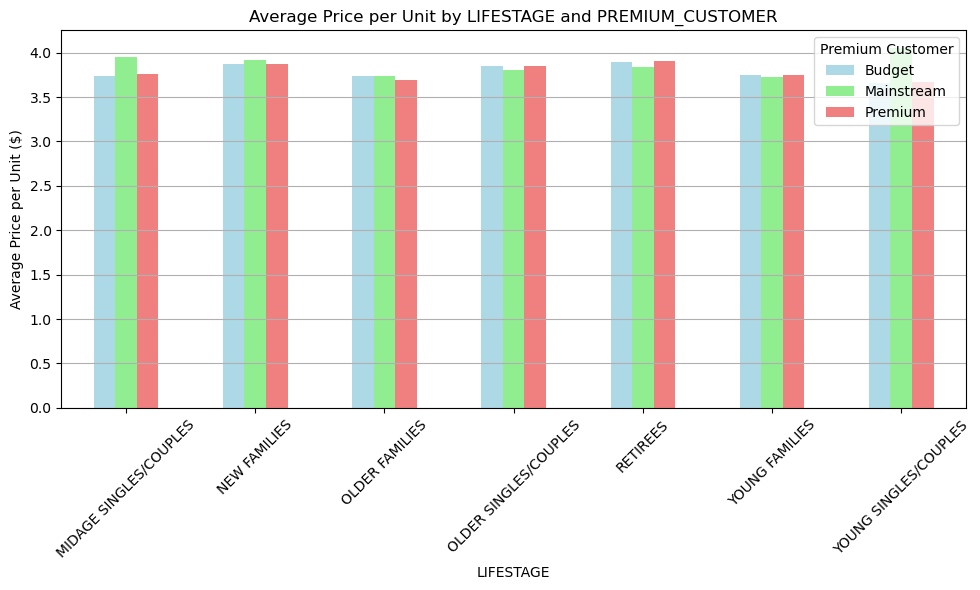

In [82]:
# Visualize the results
# Create a pivot table for better visualization
pivot_avg_price = average_price_df.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='AVG_PRICE_PER_UNIT').fillna(0)

# Plotting the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
pivot_avg_price.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price per Unit ($)')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [84]:
# Display the average price DataFrame
print(average_price_df)

                 LIFESTAGE PREMIUM_CUSTOMER  AVG_PRICE_PER_UNIT
0   MIDAGE SINGLES/COUPLES           Budget                3.73
1   MIDAGE SINGLES/COUPLES       Mainstream                3.95
2   MIDAGE SINGLES/COUPLES          Premium                3.75
3             NEW FAMILIES           Budget                3.87
4             NEW FAMILIES       Mainstream                3.92
5             NEW FAMILIES          Premium                3.87
6           OLDER FAMILIES           Budget                3.74
7           OLDER FAMILIES       Mainstream                3.74
8           OLDER FAMILIES          Premium                3.69
9    OLDER SINGLES/COUPLES           Budget                3.85
10   OLDER SINGLES/COUPLES       Mainstream                3.81
11   OLDER SINGLES/COUPLES          Premium                3.85
12                RETIREES           Budget                3.89
13                RETIREES       Mainstream                3.83
14                RETIREES          Prem

In [88]:
# Step 1: Filter for mainstream mid-age and young singles and couples
mainstream_prices = filtered_df [(filtered_df ['PREMIUM_CUSTOMER'] == 'Mainstream')]['TOT_SALES']
budget_premium_prices = filtered_df [(filtered_df ['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium']))]['TOT_SALES']

# Step 2: Perform an independent t-test
t_stat, p_value = stats.ttest_ind(mainstream_prices, budget_premium_prices, equal_var=False)

# Step 3: Interpret the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Determine if the difference is significant
if p_value < 0.05:
    significance = "ARE"
else:
    significance = "ARE NOT"

print(f"The unit price for mainstream, young and mid-age singles and couples {significance} significantly higher than that of budget or premium, young and mid-age singles and couples.")

T-statistic: 7.462726424976938, P-value: 8.570429927289258e-14
The unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and mid-age singles and couples.


In [108]:
# Filter the data for the specific customer segment
try:
    mainstream_young_singles_couples = filtered_df[filtered_df['LIFESTAGE'] == 'Mainstream - young singles/couples']
except KeyError as e:
    print(f"Error: {e}. The column 'Customer_Segment' does not exist in the DataFrame.")

# Extract pack size from PROD_NAME
filtered_df['PACK_SIZE'] = filtered_df ['PROD_NAME'].str.extract(r'(\d+)').astype(int)

# Calculate the average pack size for the segment and the rest of the population
segment_avg_pack_size = filtered_df[filtered_df['LIFESTAGE'] == 'Mainstream - young singles/couples']['PACK_SIZE'].mean()
overall_avg_pack_size = filtered_df['PACK_SIZE'].mean()

print(f"Average Pack Size for Mainstream - young singles/couples: {segment_avg_pack_size}")
print(f"Overall Average Pack Size: {overall_avg_pack_size}")

Average Pack Size for Mainstream - young singles/couples: nan
Overall Average Pack Size: 183.84064442994057
